# Tutorial exercise 3 -  exponential decay

#### In this tutorial we will simulate exponential decay in python, and see how simuations and analytics agree with each other

In [1]:
import numpy as np
from matplotlib import pyplot as plt

#### We will follow the exmaple in the lecture notes: $\frac{dI}{dt} = - \gamma I$

In the leacture notes we saw that the solution $I(t)$ of the differntial equation $\frac{dI}{dt} = - \gamma I$ is: 

$I(t) = I(0)e^{-\gamma t}$

#### Lets plot this solution

In order to plot, we have to use numeric values

We create a python function to calculate the solution above based on given numeric values:

- $I(0)$ - The inital condition, the value of $I$ in at $t=0$
- $\gamma$ - insulin removal rate

We create a function that will return a value of $I$ for a given time $t$, $I(0)$ and $\gamma$ based on the solution above:

In [2]:
def I_t_func(I0,gamma,t):
    return I0*np.e**(-gamma*t)

Using the function, we calculate the solution $I(t)$ for $t$ in the range [0,$L$], with small timestep $dt = 0.1$

$L$ is the length of the solution, we will use $L$ = 20

In [3]:
t_range = np.arange(0,20,0.1)
I_t_sol = I_t_func(I0=1,gamma=0.5,t=t_range)

We plot the solution using matplotlib

Text(0, 0.5, 'I(t)')

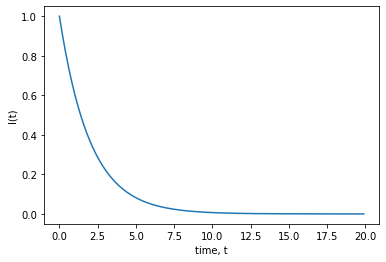

In [4]:
plt.plot(t_range,I_t_sol)
plt.xlabel('time, t')
plt.ylabel('I(t)')

We can wrap everything above into a single function

In [5]:
def plot_I_t(I0,gamma,L,dt):
    t_range = np.arange(0,L,dt)
    I_t_sol = I0*np.e**(-gamma*t_range)
    plt.plot(t_range,I_t_sol)
    plt.xlabel('time, t')
    plt.ylabel('I(t)')

We can plot the solution for any values of $I(0), \gamma, L, dt$

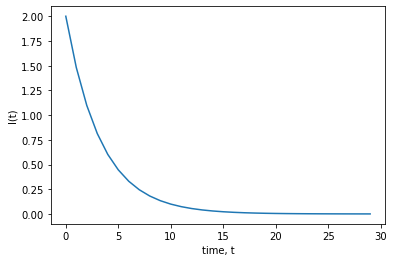

In [6]:
plot_I_t(I0=2,gamma=0.3,L=30,dt=1)

#### Lets simulate this differntial equation, to see how insulin changes over time

We will use a simple method to simulate differential equations - the eular method

Like before, in order to simualte, we have to:
- choose inital condition - the value of $I$ in the start of the simulation
- provide a numeric value for $\gamma$, 
- decide on the length of the simualtion, $L$, and the size of the time steps, $dt$

lets again use $I_0 = 1, \gamma = 0.5, L = 20, dt = 0.1$ 

In [7]:
I0      = 1
gamma   = 0.5
dt      = 0.1
L       = 20
t_range = np.arange(0,L,dt)

We loop over the time range, calculate the rate of change of $I$, $dI$, and update the value of $I$

We start with $I= I_0$

At each timestep, we record the value of $I$ into a list 'solution'

In [8]:
solution = []
I = I0
for t in t_range:
    dI = -gamma*I
    I  = I + dI*dt
    solution.append(I)

We can plot the result of the simulation using matplotlib

Text(0, 0.5, 'I(t)')

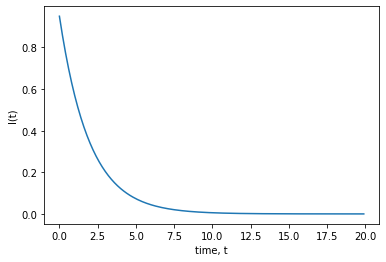

In [9]:
plt.plot(t_range,solution)
plt.xlabel('time, t')
plt.ylabel('I(t)')

We can wrap the simulation into a function

In [10]:
def plot_eular_simulation(I0,gamma,L,dt):
    t_range = np.arange(0,L,dt)
    solution = []
    I = I0
    for t in t_range:
        dI = -gamma*I
        I  = I + dI*dt
        solution.append(I)
    
    plt.plot(t_range,solution)
    plt.xlabel('time, t')
    plt.ylabel('I(t)')

Finally, we can compare the analytical solution and the simulation

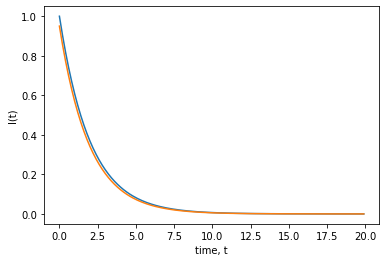

In [11]:
plot_I_t(I0=1,gamma=0.5,L=20,dt=0.1)
plot_eular_simulation(I0=1,gamma=0.5,L=20,dt=0.1)

They agree but there is some difference. 

The Eualr method is more accurate for smaller timesteps, choosing smaller $dt$ gives a better agreement between the analytical solution and the simulation

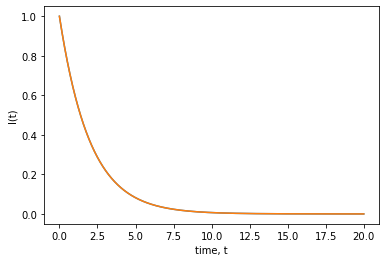

In [14]:
plot_I_t(I0=1,gamma=0.5,L=20,dt=0.001)
plot_eular_simulation(I0=1,gamma=0.5,L=20,dt=0.001)

#### In the next tutorials, we will see how we can solve and simualte differential equations using sympy